In [1]:
import os
import sys
import torch
from torch.utils.data import Dataset
from pycocotools.coco import COCO
from torchvision import transforms
from PIL import Image
from torchvision.datasets import CocoDetection
from dataset import SynData
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()

val_dataset = CocoDetection(root=os.environ.get("COCO_DATA_DIR_VAL"), annFile='../car_boat_bus_val.json', transform=transforms.Resize((512, 512)))

/opt/homebrew/anaconda3/envs/adlcv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


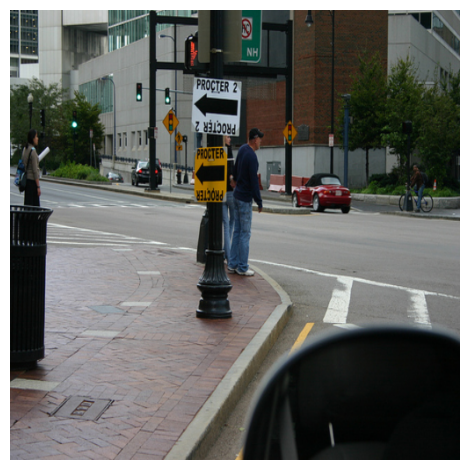

AttributeError: module 'PIL.Image' has no attribute 'Draw'

In [17]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

for _ in range(10):
    syn_num = random.randint(0, len(val_dataset)-1)
    img, data = val_dataset[syn_num]
    data = data[0]
    plt.imshow(img)
    plt.axis('off')
    plt.tight_layout()
    #plt.savefig(f"poster-example-imgs/val_data_{syn_num}.png", bbox_inches='tight', pad_inches=0, dpi=600)
    plt.show()

    #masks = data['masks']
    polygons = data['segmentation']

    # Create a blank mask image
    mask_image = Image.new('L', img.size, 0)

    # Draw the polygons on the mask image
    for polygon in polygons:
        Image.Draw(mask_image).polygon(polygon, outline=1, fill=1)

    # Convert the mask image to a binary mask
    binary_mask = np.array(mask_image)

    # Create a PIL Image object from the binary mask
    mask_image = Image.fromarray(binary_mask, mode='L')

    # Convert the original image to RGBA mode
    rgba_image = img.convert('RGBA')

    # Create a new image with transparent background
    transparent_image = Image.new('RGBA', rgba_image.size, (0, 0, 0, 0))

    # Paste the original image onto the transparent image using the binary mask as the alpha channel
    transparent_image.paste(rgba_image, (0, 0), mask=mask_image)

    # Display the transparent image
    plt.imshow(transparent_image)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    #plt.savefig(f"poster-example-imgs/val_data_{syn_num}_mask.png", bbox_inches='tight', pad_inches=0, dpi=600, transparent=True)


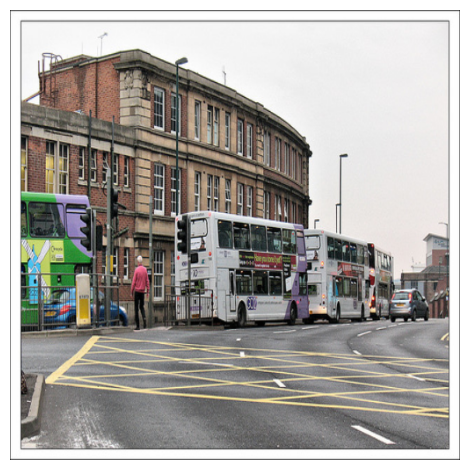

In [2]:
import random
img_num = random.randint(0, len(val_dataset)-1)
plt.imshow(val_dataset[img_num][0])
plt.axis('off')
plt.tight_layout()
plt.savefig(f"poster-example-imgs/coco_val_{img_num}.png", bbox_inches='tight', pad_inches=0, dpi = 600)

In [3]:
syn_dataset = SynData(os.environ.get("SYN_DATA_DIR"), {"car": 2, "bus": 1, "boat": 3})

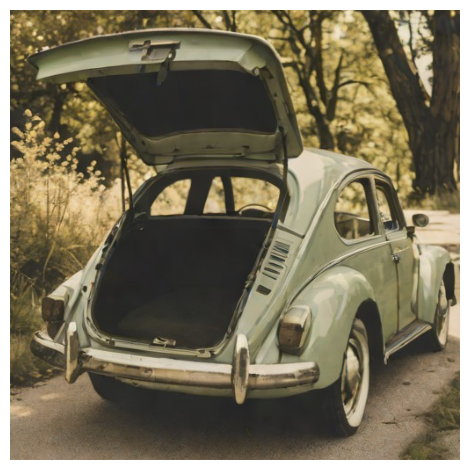

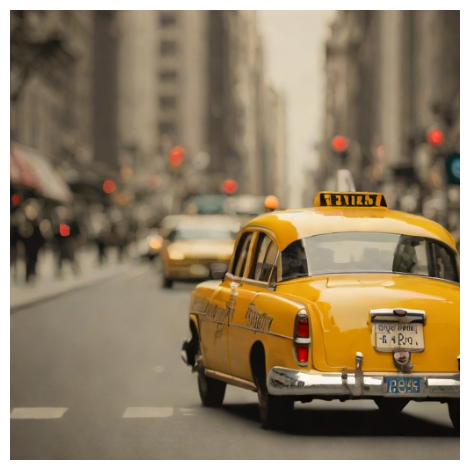

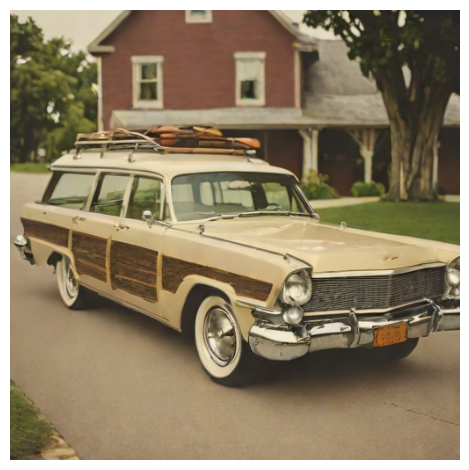

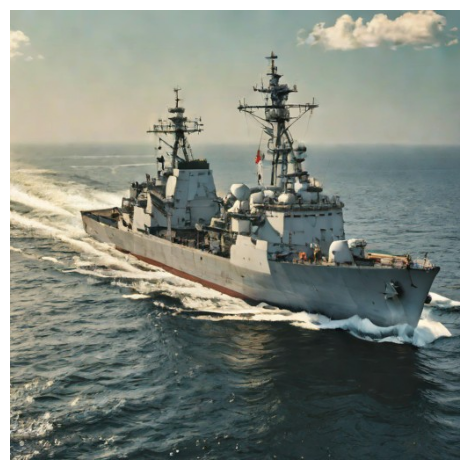

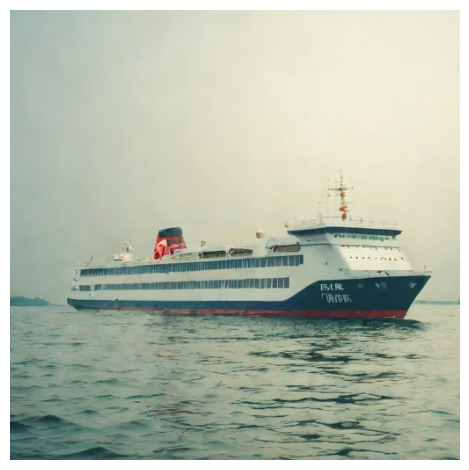

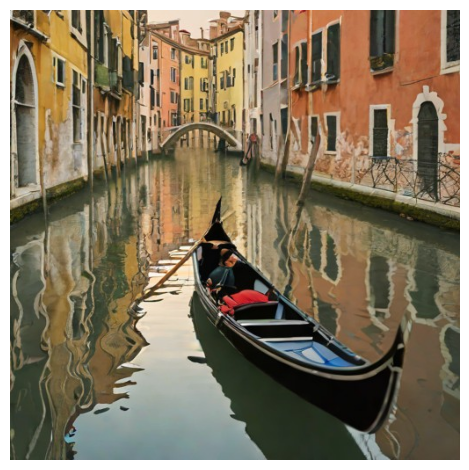

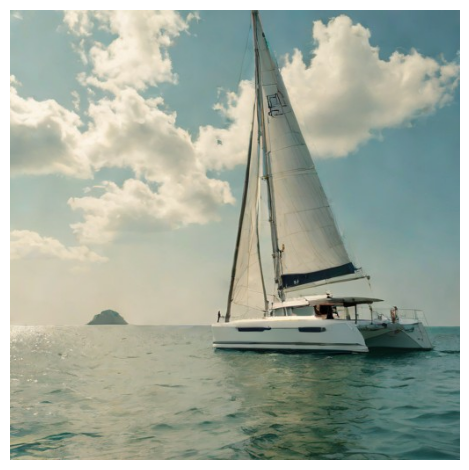

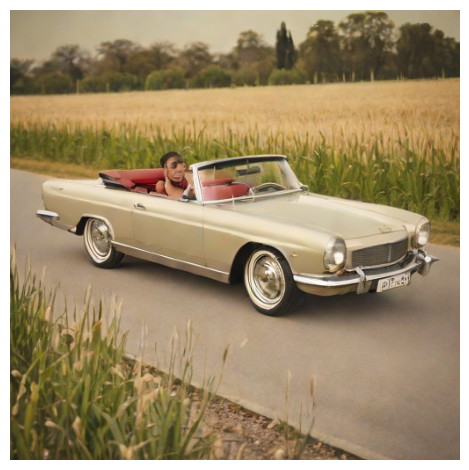

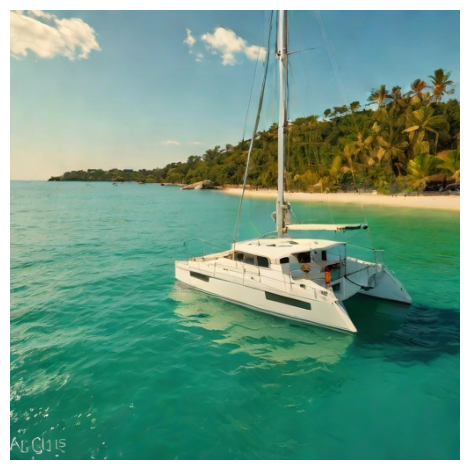

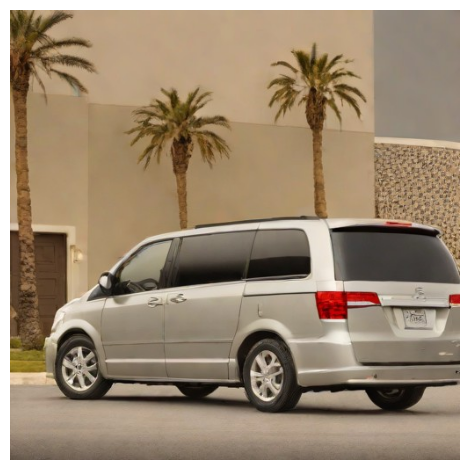

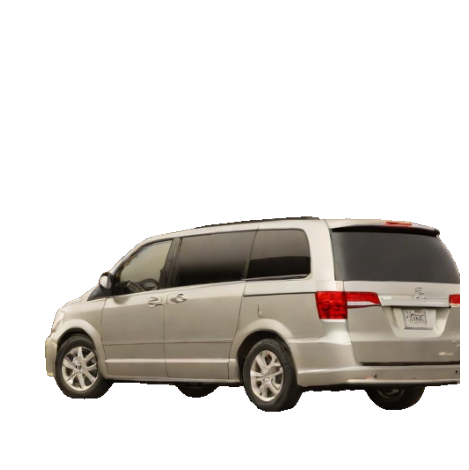

In [12]:
for _ in range(10):
    import random
    syn_num = random.randint(0, len(syn_dataset)-1)
    data = syn_dataset[syn_num]
    plt.imshow(data['image'])
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"poster-example-imgs/syn_data_{syn_num}.png", bbox_inches='tight', pad_inches=0, dpi = 600)
    plt.show()
    mask = data['masks']
    from PIL import Image
    import numpy as np
    # Assuming you have the original image and the segmentation mask
    original_image = data['image']
    segmentation_mask = mask[0]

    # Convert the segmentation mask to a binary mask
    binary_mask = np.where(segmentation_mask > 0, 255, 0).astype(np.uint8)

    # Create a PIL Image object from the binary mask
    mask_image = Image.fromarray(binary_mask, mode='L')

    # Convert the original image to RGBA mode
    rgba_image = Image.fromarray(original_image).convert('RGBA')

    # Create a new image with transparent background
    transparent_image = Image.new('RGBA', rgba_image.size, (0, 0, 0, 0))

    # Paste the original image onto the transparent image using the binary mask as the alpha channel
    transparent_image.paste(rgba_image, (0, 0), mask=mask_image)

    # Display the transparent image
    plt.imshow(transparent_image)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"poster-example-imgs/syn_data_{syn_num}_mask.png", bbox_inches='tight', pad_inches=0, dpi = 600, transparent=True)
